In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
# Read the CSV file
df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [13]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
print(df_encoded.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0        False         False                    False   
1         0        False         False                    False   
2         0         True         False                    False   
3         0        False         False                     True   
4         0         True         False                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                 False             

In [14]:
boolean_columns = df_encoded.select_dtypes(include=bool).columns
numerical_columns = df_encoded.select_dtypes(include=np.number).columns
print(boolean_columns)
print(numerical_columns)

Index(['gender_Male', 'gender_Other', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


In [15]:
numerical_columns = numerical_columns.drop(['diabetes', 'age'])
boolean_columns = boolean_columns.insert(0, 'diabetes')
boolean_columns = boolean_columns.insert(0, 'age')

scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)
df_scaled = pd.concat([df_numerical_scaled, df_encoded[boolean_columns]], axis=1)

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64


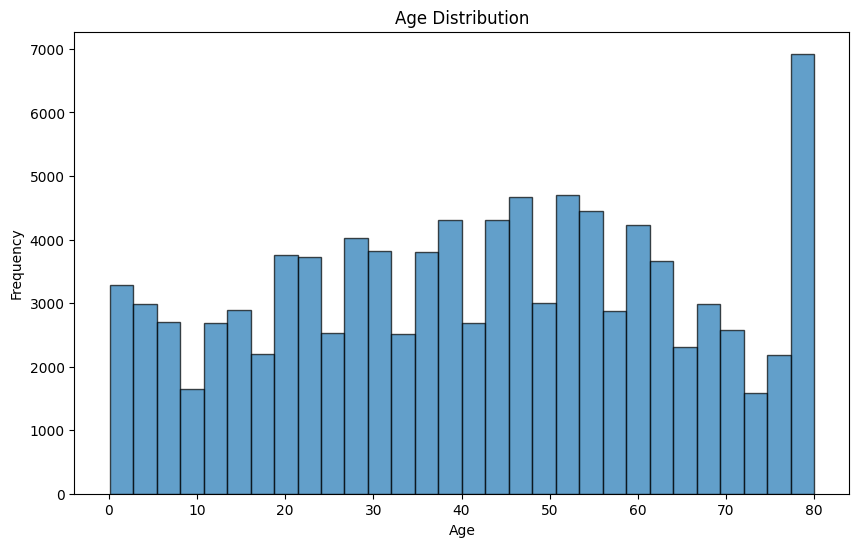

In [16]:
# Get distribution information on the 'age' group
age_distribution = df['age'].describe()
print(age_distribution)

# Plot the distribution of the 'age' group
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
age_groups = [(0, 29), (30, 59), (60, 89)]

datasets = {}
for start, end in age_groups:
    group_name = f"{start}-{end}"
    datasets[group_name] = df_scaled[(df_scaled['age'] >= start) & (df_scaled['age'] <= end)]

# Display the number of records in each dataset
for group_name, dataset in datasets.items():
    print(f"Age group {group_name}: {len(dataset)} records")

Age group 0-29: 32435 records
Age group 30-59: 42510 records
Age group 60-89: 25055 records


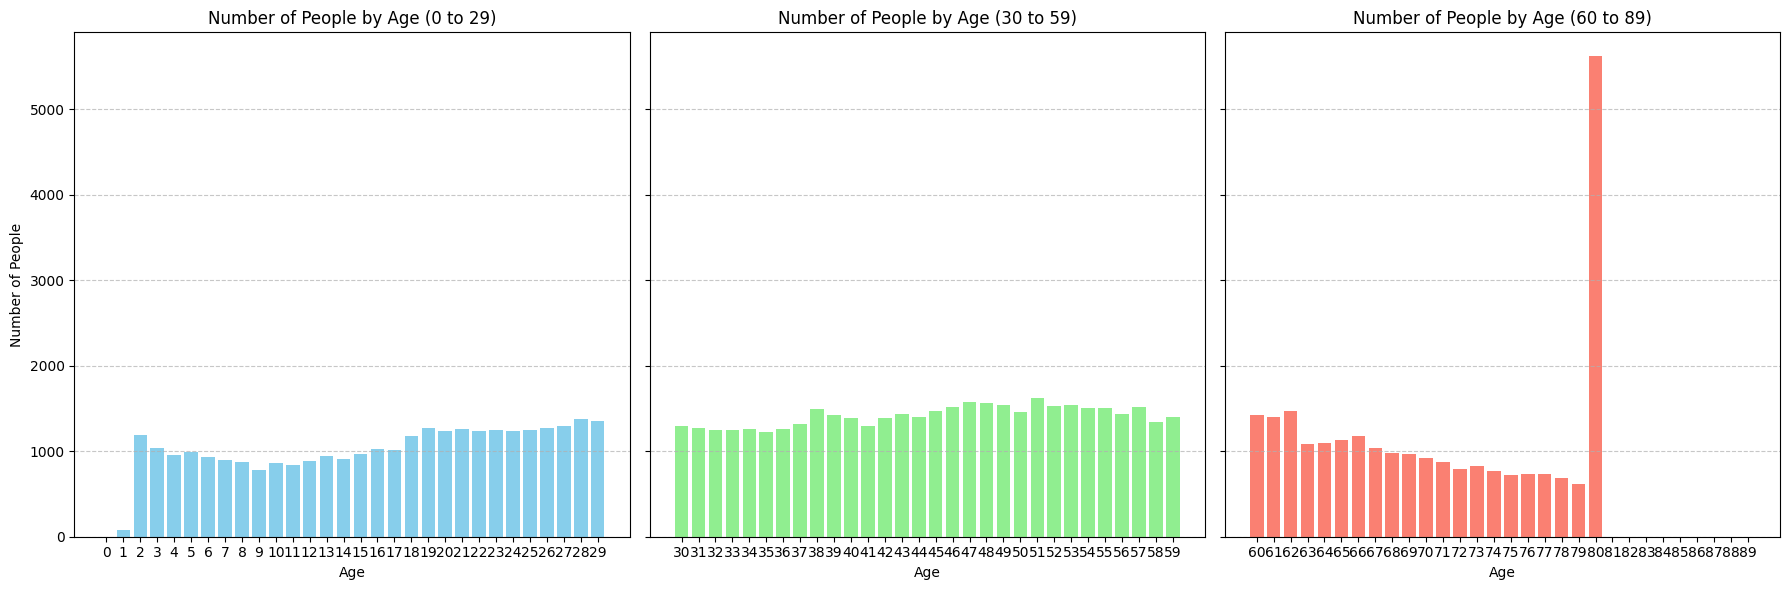

In [28]:
# Initialize dictionaries to store the counts for each age group
age_counts_0_29 = {}
age_counts_30_59 = {}
age_counts_60_89 = {}

# Function to count records for a given age range
def count_age_records(df, start_age, end_age):
    age_counts = {}
    for age in range(start_age, end_age + 1):
        age_df = df[df['age'] == age]
        count = age_df.shape[0]
        age_counts[age] = count
    return age_counts

# Count records for each age group
age_counts_0_29 = count_age_records(df, 0, 29)
age_counts_30_59 = count_age_records(df, 30, 59)
age_counts_60_89 = count_age_records(df, 60, 89)

# Plot the counts as bar charts side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for age group 0-29
axes[0].bar(age_counts_0_29.keys(), age_counts_0_29.values(), color='skyblue')
axes[0].set_title('Number of People by Age (0 to 29)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of People')
axes[0].set_xticks(list(age_counts_0_29.keys()))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for age group 30-59
axes[1].bar(age_counts_30_59.keys(), age_counts_30_59.values(), color='lightgreen')
axes[1].set_title('Number of People by Age (30 to 59)')
axes[1].set_xlabel('Age')
axes[1].set_xticks(list(age_counts_30_59.keys()))
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for age group 60-89
axes[2].bar(age_counts_60_89.keys(), age_counts_60_89.values(), color='salmon')
axes[2].set_title('Number of People by Age (60 to 89)')
axes[2].set_xlabel('Age')
axes[2].set_xticks(list(age_counts_60_89.keys()))
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### A possible reason why the autoencoder model for 60-89 performs badly is because of the uneven distribution of people that are 80 years old, as shown in the diagram above.

In [29]:
# Initialize an empty dictionary to store the counts
age_counts = {}

# Loop through each age from 60 to 90
for age in range(60, 91):
    # Filter the dataframe for the current age
    age_df = df[df['age'] == age]
    
    # Count the number of records for the current age
    count = age_df.shape[0]
    
    # Store the count in the dictionary
    age_counts[age] = count
    
    # Print the count for the current age
    print(f"Number of people of age {age}: {count}")

# Optionally, you can print the entire dictionary
print("Age counts:", age_counts)

Number of people of age 60: 1423
Number of people of age 61: 1403
Number of people of age 62: 1474
Number of people of age 63: 1089
Number of people of age 64: 1098
Number of people of age 65: 1134
Number of people of age 66: 1176
Number of people of age 67: 1040
Number of people of age 68: 977
Number of people of age 69: 966
Number of people of age 70: 919
Number of people of age 71: 871
Number of people of age 72: 790
Number of people of age 73: 823
Number of people of age 74: 764
Number of people of age 75: 721
Number of people of age 76: 733
Number of people of age 77: 730
Number of people of age 78: 682
Number of people of age 79: 621
Number of people of age 80: 5621
Number of people of age 81: 0
Number of people of age 82: 0
Number of people of age 83: 0
Number of people of age 84: 0
Number of people of age 85: 0
Number of people of age 86: 0
Number of people of age 87: 0
Number of people of age 88: 0
Number of people of age 89: 0
Number of people of age 90: 0
Age counts: {60: 14